In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-train-df/cleanedTrain.csv


Downloading the dataset


In [2]:
cleaned_train_df=pd.read_csv("/kaggle/input/cleaned-train-df/cleanedTrain.csv")
cleaned_train_df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,total_sales
0,10493832,-0.709489,-1.101399,0.180599,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,-0.982408
1,10178643,-0.330507,-1.010208,0.390355,1,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-0.617597
2,10513916,0.365429,-0.883967,1.313829,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.494808
3,10334589,0.351545,-0.806410,1.297473,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.544047
4,10458365,0.421810,-0.707480,1.339778,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0.686005


In [3]:
cleaned_train_df.columns


Index(['Customer_ID', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory', 'outlet_city_Batticaloa', 'outlet_city_Colombo',
       'outlet_city_Dehiwala-Mount Lavinia', 'outlet_city_Galle',
       'outlet_city_Gampaha', 'outlet_city_Homagama', 'outlet_city_Jaffna',
       'outlet_city_Kaduwela', 'outlet_city_Kalmunai', 'outlet_city_Kandy',
       'outlet_city_Katunayake', 'outlet_city_Kelaniya', 'outlet_city_Kotte',
       'outlet_city_Moratuwa', 'outlet_city_Negombo',
       'outlet_city_Nuwara Eliya', 'outlet_city_Panadura',
       'outlet_city_Peliyagoda', 'outlet_city_Trincomalee',
       'outlet_city_Wattala', 'total_sales'],
      dtype='object')

#  splitting data

In [4]:
X = cleaned_train_df[['luxury_sales', 'fresh_sales', 'dry_sales',
       'outlet_city_Batticaloa', 'outlet_city_Colombo',
       'outlet_city_Dehiwala-Mount Lavinia', 'outlet_city_Galle',
       'outlet_city_Gampaha', 'outlet_city_Homagama', 'outlet_city_Jaffna',
       'outlet_city_Kaduwela', 'outlet_city_Kalmunai', 'outlet_city_Kandy',
       'outlet_city_Katunayake', 'outlet_city_Kelaniya', 'outlet_city_Kotte',
       'outlet_city_Moratuwa', 'outlet_city_Negombo',
       'outlet_city_Nuwara Eliya', 'outlet_city_Panadura',
       'outlet_city_Peliyagoda', 'outlet_city_Trincomalee',
       'outlet_city_Wattala', 'total_sales']]
y = cleaned_train_df['cluster_catgeory']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [7]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [8]:
# Make predictions on the validation set
y_pred = lr_model.predict(X_val)

In [9]:
# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Accuracy: 0.9997674869211393
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# KNN Algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose different k values
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_val)

In [13]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Accuracy: 0.9997610282245043
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = nb_model.predict(X_val)


In [17]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))



Accuracy: 0.8594781373118905
              precision    recall  f1-score   support

           1       1.00      0.85      0.92     37863
           2       1.00      1.00      1.00     30989
           3       0.37      1.00      0.54      9645
           4       0.87      1.00      0.93     34418
           5       1.00      0.33      0.50      7934
           6       1.00      0.68      0.81     33981

    accuracy                           0.86    154830
   macro avg       0.87      0.81      0.78    154830
weighted avg       0.93      0.86      0.87    154830



# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf.predict(X_val)

In [21]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Accuracy: 0.9997674869211393
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



# Clustering

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:


# Assuming 'cleaned_train_df' contains the cleaned dataset with 'cluster_category' column
# Group data by cluster category
cluster_groups = cleaned_train_df.groupby('cluster_catgeory')

# Define cluster names (you can customize these)
cluster_names = {
    1: "Cluster 1",
    2: "Cluster 2",
    3: "Cluster 3",
    4: "Cluster 4",
    5: "Cluster 5",
    6: "Cluster 6"
}

# Iterate over each cluster group
for cluster_id, group_df in cluster_groups:
    print(f"Cluster: {cluster_names[cluster_id]}")
    print("Cluster Characteristics:")
    
    # Calculate statistics for relevant features
    features = group_df[[ 'luxury_sales', 'fresh_sales', 'dry_sales',
       'outlet_city_Batticaloa', 'outlet_city_Colombo',
       'outlet_city_Dehiwala-Mount Lavinia', 'outlet_city_Galle',
       'outlet_city_Gampaha', 'outlet_city_Homagama', 'outlet_city_Jaffna',
       'outlet_city_Kaduwela', 'outlet_city_Kalmunai', 'outlet_city_Kandy',
       'outlet_city_Katunayake', 'outlet_city_Kelaniya', 'outlet_city_Kotte',
       'outlet_city_Moratuwa', 'outlet_city_Negombo',
       'outlet_city_Nuwara Eliya', 'outlet_city_Panadura',
       'outlet_city_Peliyagoda', 'outlet_city_Trincomalee',
       'outlet_city_Wattala', 'total_sales']].describe()
    
    # Print statistics
    print(features)
    print("\n")


Cluster: Cluster 1
Cluster Characteristics:
        luxury_sales    fresh_sales      dry_sales    total_sales
count  188984.000000  188984.000000  188984.000000  188984.000000
mean       -0.357387      -0.671782       1.102895       0.302635
std         0.575330       0.235544       0.860108       1.105018
min        -1.416222      -1.103153      -1.179123      -1.698544
25%        -0.843057      -0.872170       0.356647      -0.654965
50%        -0.381122      -0.676306       1.102970       0.302204
75%         0.081382      -0.481114       1.846134       1.256754
max         3.095870       2.429325       2.734583       2.596554


Cluster: Cluster 2
Cluster Characteristics:
        luxury_sales    fresh_sales      dry_sales    total_sales
count  155064.000000  155064.000000  155064.000000  155064.000000
mean       -0.669590       0.694786      -0.858384      -0.334125
std         0.392704       0.586652       0.155899       0.737390
min        -1.416122      -1.058724      -1.151595  

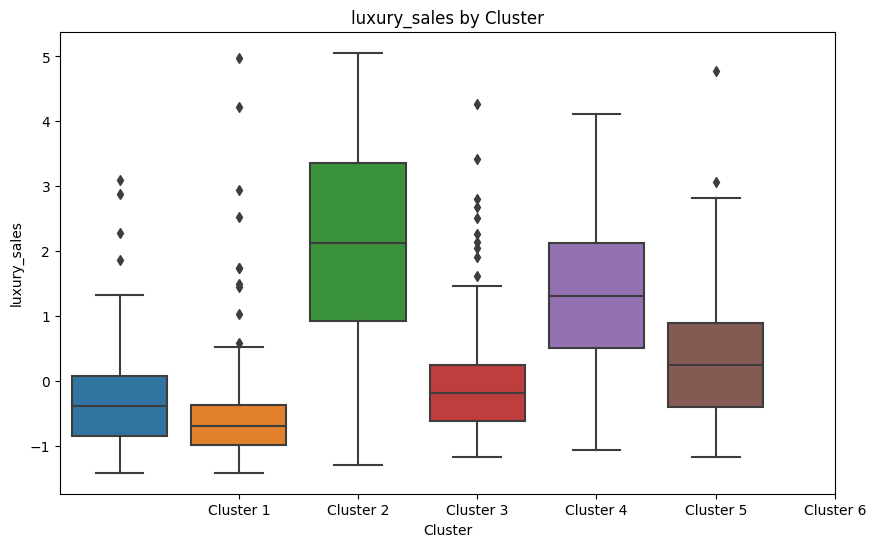

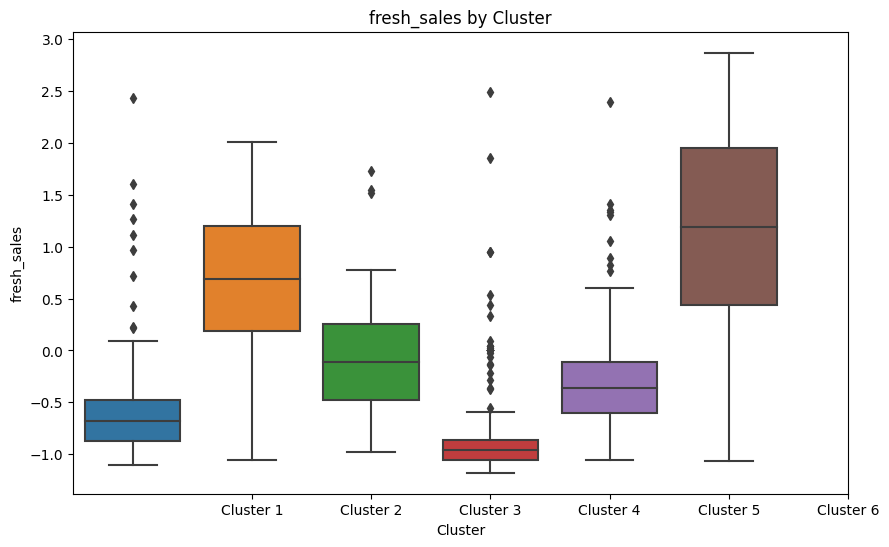

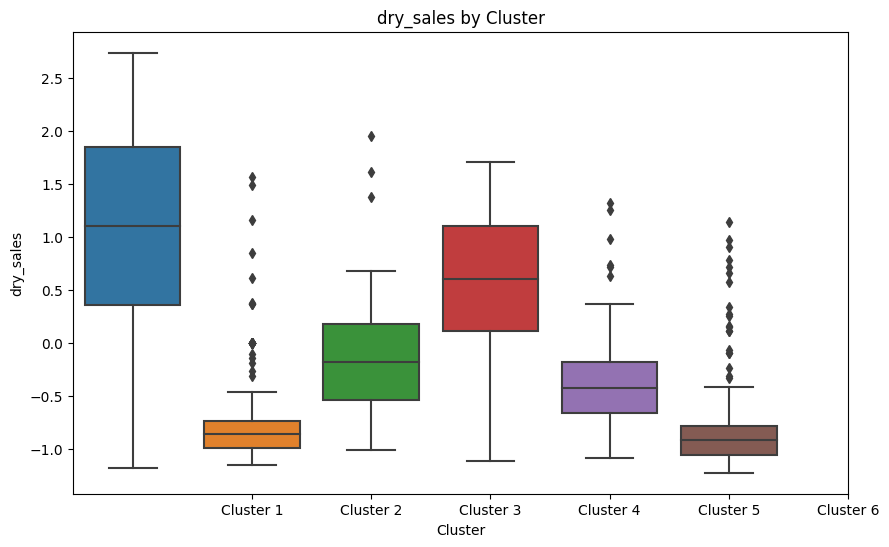

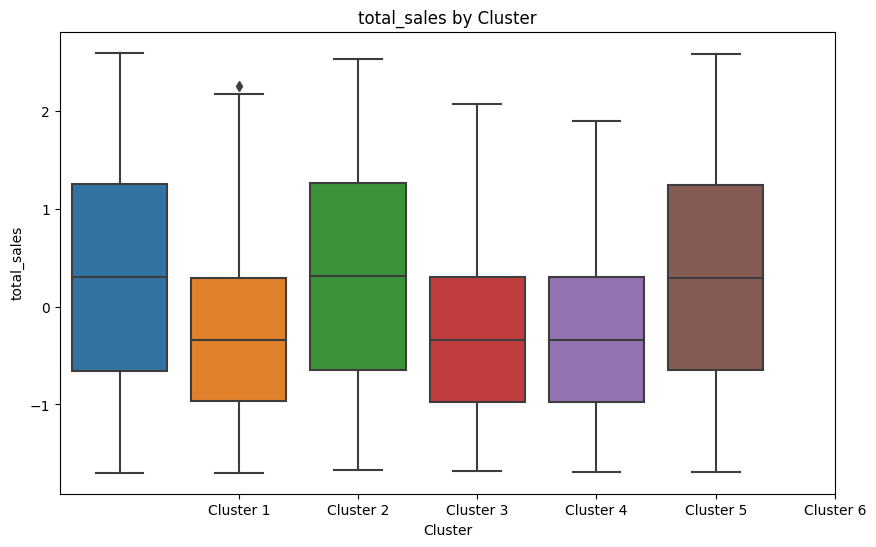

In [24]:
for feature in features:
    # Create a box plot for each feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_catgeory', y=feature, data=cleaned_train_df)
    plt.title(f"{feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.xticks(ticks=range(1, 7), labels=[cluster_names[i] for i in range(1, 7)])
    plt.show()